In [ ]:
## Notebook env: mirtud_env (R kernel)

In [1]:
library(Seurat)
library(tidyverse)
library(EnrichmentBrowser)
library(ggplot2)
library(ggpubr)
library(ggrepel)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are

In [2]:
### Load Data ###
## load single cell log2FC ##
# miR
miR_seuratobj = readRDS('/home/ssobti/projects/mir_tud/output_data/genexp_pathway/miR_seuratobj_from_pseudobulk_pathway_analysis_miR_nb.rds')
sc_meta = miR_seuratobj@meta.data
miR_139_over_TuD_NC_log2FC_sc = FoldChange(miR_seuratobj,`cells.1` = rownames(sc_meta)[sc_meta$guide == 'TuD_NC'],`cells.2` = rownames(sc_meta)[sc_meta$guide == 'hsa-miR-139-5p'], ident.1 = rownames(sc_meta)[sc_meta$guide == 'hsa-miR-139-5p'])

# tRF
tRF_seuratobj = readRDS('/home/ssobti/projects/mir_tud/output_data/genexp_pathway/tRF_seuratobj_from_pseudobulk_pathway_analysis_tRF_nb.rds')
sc_meta = tRF_seuratobj@meta.data
tRF_Val_CAC_2_1_rh_over_TuD_NC_log2FC_sc = FoldChange(tRF_seuratobj,`cells.1` = rownames(sc_meta)[sc_meta$guide == 'TuD_NC'],`cells.2` = rownames(sc_meta)[sc_meta$guide == 'tRNA-Val-CAC-2-1.rh'], ident.1 = rownames(sc_meta)[sc_meta$guide == 'tRNA-Val-CAC-2-1.rh'])

## load bulk log2FC ##
res = readRDS('/home/ssobti/projects/mir_tud/output_data/wetlab_followup/bulk_rna_seq/pathway_validation/pathway_hits_salmon.rds')
miR_139_over_TuD_NC_log2FC_bulk = res[['hsa-miR-139-5p']]
tRF_Val_CAC_2_1_rh_over_TuD_NC_log2FC_bulk = res[['tRNA-Val-CAC-2-1.rh']]

## load GO pathways ##
go_genesets = getGenesets('hsa', db = 'enrichr', gene.id.type = 'SYMBOL', lib = 'GO_Biological_Process_2021')


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete




In [ ]:
sc_meta = miR_seuratobj@meta.data
miR_139_over_TuD_NC_log2FC_sc = FoldChange(miR_seuratobj,`cells.1` = rownames(sc_meta)[sc_meta$guide == 'TuD_NC'],`cells.2` = rownames(sc_meta)[sc_meta$guide == 'hsa-miR-139-5p'], ident.1 = rownames(sc_meta)[sc_meta$guide == 'hsa-miR-139-5p'])
miR_139_over_TuD_NC_log2FC_bulk = res[['hsa-miR-139-5p']]

## GO:0006695 **, GO:1902653 **, GO:0016126, GO:0033344, GO:0032367, GO:0008203

In [3]:
## load pathways relevant for miR-139-5p ## 

#miR_pathways = c('GO:0098708', 'GO:0046351', 'GO:0140271', 'GO:0006096') ## mir34a 'GO:0006007' will be added later since its not found in 'go_genesets'
miR_pathways = c('GO:0006695', 'GO:1902653', 'GO:0016126', 'GO:0033344', 'GO:0032367', 'GO:0008203') #mir 139
# miR_pathways = c('GO:0003056', 'GO:0045986', 'GO:0010839') #mir 629
## load pathways relevant for tRF-Val-CAC-2-1.rh ##

## GO:0031440, GO:0098962, GO:1900363
## mRNA 3\'-end processing (GO:0031124)
## mRNA export from nucleus (GO:0006406)
## mRNA splicing, via spliceosome (GO:0000398)

tRF_pathways = c('GO:0031440', 'GO:0098962', 'GO:1900363', 'GO:0031124', 'GO:0006406', 'GO:0000398')


## get correct pathways ##
miR_pathways_list = list()

for (i in 1:length(miR_pathways)){
  miR_pathways_list[[i]] = go_genesets[[grep(names(go_genesets), pattern = miR_pathways[i])]]
}
#GO_0006007 = c('1700017N19Rik,Akap8l,Akap8l,Alkbh5,Alkbh5,Alyref,Alyref,Alyref2,Alyref2,Alyreffm1,Alyreffm1,Alyreffm2,Alyreffm3,Alyreffm3,Alyreffm4,Alyreffm4,Alyreffm5,Alyreffm5,Alyreffm6,Alyreffm6,Alyreffm7,Alyreffm8,Alyreffm9,Alyreffm10,Alyreffm10,Alyreffm11,Alyreffm14,Casc3,Chtop,Ddx19a,Ddx19b,Ddx25,Ddx25,Ddx39a,Ddx39a,Ddx39a,Ddx39b,Ddx39b,Ddx39b,Eif4a3,Eif4e,Eif4e,Eny2,Eny2,Eny2,Fmr1,Fmr1,Fyttd1,Fyttd1,Fyttd1,Gle1,Gle1,Hhex,Hhex,Hnrnpa2b1,Hnrnpa2b1,Hnrnpa2b1,Iws1,Iws1,Iws1,Magoh,Magohb,Mcm3ap,Mcm3ap,Mcm3ap,Ncbp1,Ncbp1,Ncbp1,Ncbp1,Ncbp2,Ncbp3,Ncbp3,Nsun2,Nsun2,Nup85,Nup88,Nup93,Nup107,Nup107,Nup107,Nup133,Nup133,Nup133,Nup155,Nup160,Nup160,Nup214,Nup214,Nxf1,Nxf1,Nxf1,Nxf1,Nxf2,Nxf2,Nxf2,Nxf3,Nxf3,Nxf3,Nxf7,Nxt1,Nxt1,Nxt1,Nxt2,Pabpn1,Pcid2,Poldip3,Poldip3,Poldip3,Rbm8a,Rbm15b,Sarnp,Sarnp,Sarnp,Sem1,Setd2,Setd2,Srsf3,Srsf3,Supt6,Thoc1,Thoc1,Thoc1,Thoc2,Thoc2,Thoc2,Thoc2,Thoc2,Thoc2l,Thoc2l,Thoc2l,Thoc3,Thoc3,Thoc3,Thoc5,Thoc5,Thoc5,Thoc5,Thoc6,Thoc6,Thoc6,Thoc7,Thoc7,Thoc7,Tpr,Tpr,Tpr,Wnk1,Wnk1,Xpo1,Xpo1,Ythdc1,Ythdc1,Zc3h11a,Zc3h11a')
#GO_0006007 = unlist(strsplit(GO_0006007,","))

#miR_pathways_list[[length(miR_pathways_list)+1]] = GO_0006007
names(miR_pathways_list) = miR_pathways

tRF_pathways_list = list()

for (i in 1:length(tRF_pathways)){
  tRF_pathways_list[[i]] = go_genesets[[grep(names(go_genesets), pattern = tRF_pathways[i])]]
}
names(tRF_pathways_list) = tRF_pathways

In [ ]:
miR_fold_change_dfs = list()
miR_sc = list()
miR_bulk = list()
for (i in 1:length(miR_pathways_list)){
    miR_sc[[i]] = data.frame(gene = rownames(miR_139_over_TuD_NC_log2FC_sc[miR_pathways_list[[i]],]), sc_log2FC = miR_139_over_TuD_NC_log2FC_sc[miR_pathways_list[[i]], 'avg_log2FC']) %>% drop_na() %>% as.data.frame()
    miR_bulk[[i]] = data.frame(gene = miR_139_over_TuD_NC_log2FC_bulk[match(miR_pathways_list[[i]], miR_139_over_TuD_NC_log2FC_bulk$symbol), 'symbol'], bulk_log2FC = miR_139_over_TuD_NC_log2FC_bulk[match(miR_pathways_list[[i]], miR_139_over_TuD_NC_log2FC_bulk$symbol), 'log2FoldChange'])
    miR_fold_change_dfs[[i]] = merge(miR_sc[[i]], miR_bulk[[i]], by = 'gene')
}
# saveRDS(miR_fold_change_dfs, '/home/ssobti/projects/mir_tud/fig_output/data/fig4/miR_fold_change_dfs_sc_bulk_comparisons.rds')

In [ ]:
tRF_fold_change_dfs = list()
tRF_sc = list()
tRF_bulk = list()
for (i in 1:length(tRF_pathways_list)){
    tRF_sc[[i]] = data.frame(gene = rownames(tRF_Val_CAC_2_1_rh_over_TuD_NC_log2FC_sc[tRF_pathways_list[[i]],]), sc_log2FC = tRF_Val_CAC_2_1_rh_over_TuD_NC_log2FC_sc[tRF_pathways_list[[i]], 'avg_log2FC']) %>% drop_na() %>% as.data.frame()
    tRF_bulk[[i]] = data.frame(gene = tRF_Val_CAC_2_1_rh_over_TuD_NC_log2FC_bulk[match(tRF_pathways_list[[i]], tRF_Val_CAC_2_1_rh_over_TuD_NC_log2FC_bulk$symbol), 'symbol'], bulk_log2FC = tRF_Val_CAC_2_1_rh_over_TuD_NC_log2FC_bulk[match(tRF_pathways_list[[i]], tRF_Val_CAC_2_1_rh_over_TuD_NC_log2FC_bulk$symbol), 'log2FoldChange'])
    tRF_fold_change_dfs[[i]] = merge(tRF_sc[[i]], tRF_bulk[[i]], by = 'gene')
}
# saveRDS(tRF_fold_change_dfs, '/home/ssobti/projects/mir_tud/fig_output/data/fig4/tRF_fold_change_dfs_sc_bulk_comparisons.rds')

### miR-139-5p ###

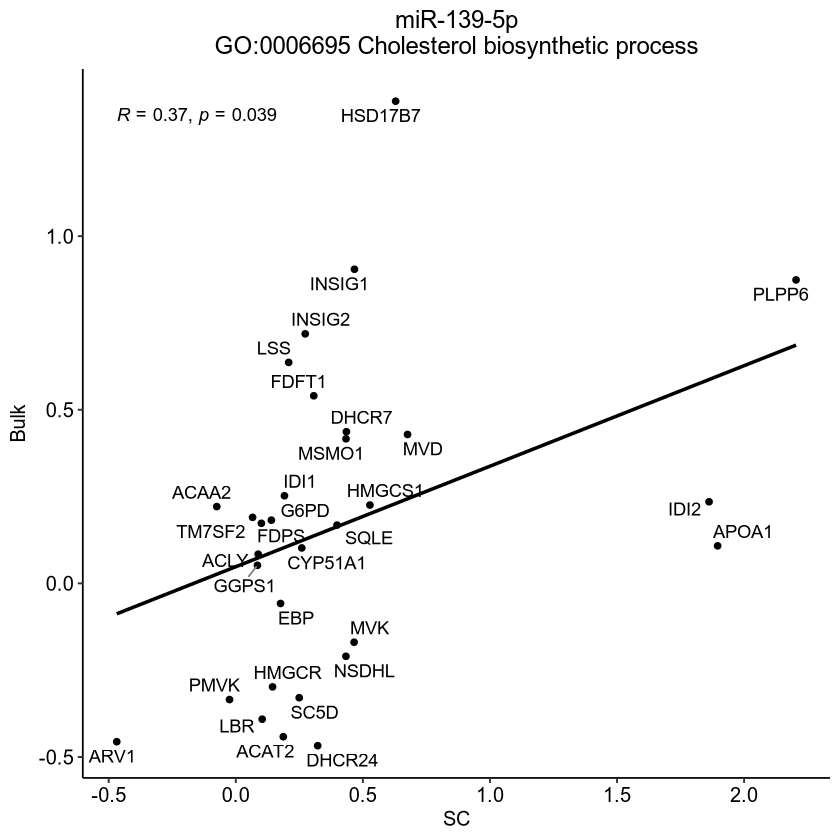

In [40]:
ggplot(data = miR_fold_change_dfs[[1]], aes(x = sc_log2FC, y = bulk_log2FC)) +
    geom_smooth(method = "lm", formula = y ~ x, se = F, color = 'black') + geom_point() + xlab('SC') + ylab('Bulk') +
    stat_cor(aes(), method = "pearson") + theme_pubr() + geom_text_repel(aes(label = gene), segment.color = 'grey50') + 
    ggtitle('miR-139-5p\nGO:0006695 Cholesterol biosynthetic process') + #ylim(-0.32, 0.32) + xlim(-0.32, 0.32) +
    theme(plot.title = element_text(hjust = 0.5))

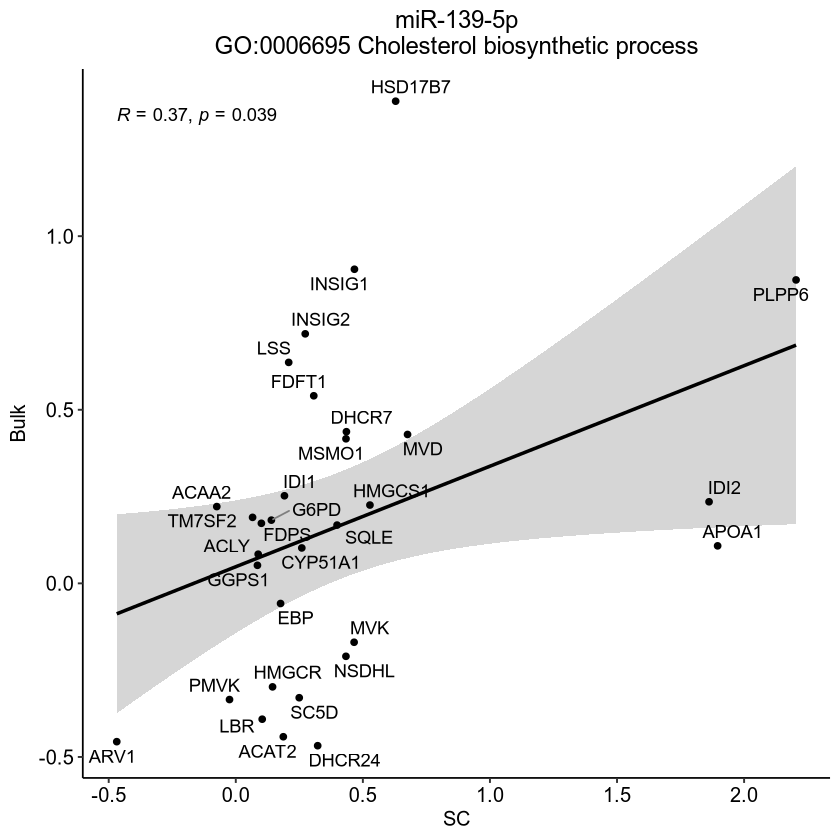

In [35]:
ggplot(data = miR_fold_change_dfs[[1]], aes(x = sc_log2FC, y = bulk_log2FC)) +
    geom_smooth(method = "lm", formula = y ~ x, se = T, color = 'black') + geom_point() + xlab('SC') + ylab('Bulk') +
    stat_cor(aes(), method = "pearson") + theme_pubr() + geom_text_repel(aes(label = gene), segment.color = 'grey50') + 
    ggtitle('miR-139-5p\nGO:0006695 Cholesterol biosynthetic process') + #ylim(-0.32, 0.32) + xlim(-0.32, 0.32) +
    theme(plot.title = element_text(hjust = 0.5))

### tRF-Val-CAC-2-1.rh ###

Warning message:
“ggrepel: 64 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


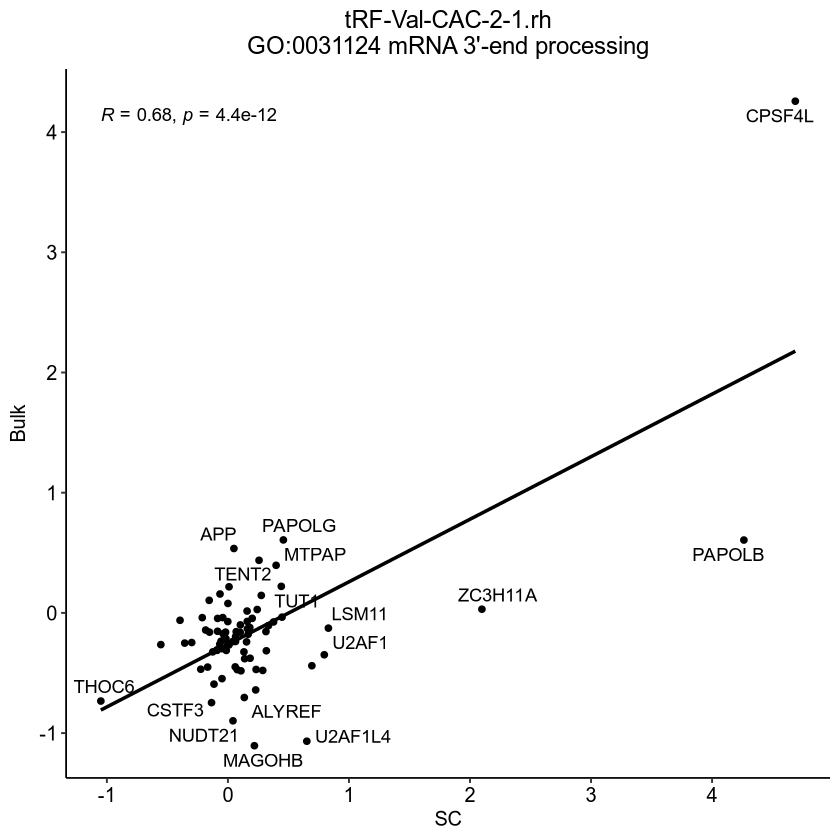

In [39]:
## include p-value and show R not R^2
ggplot(data = tRF_fold_change_dfs[[4]], aes(x = sc_log2FC, y = bulk_log2FC)) +
    geom_smooth(method = "lm", formula = y ~ x, se = F, color = 'black') + geom_point() + xlab('SC') + ylab('Bulk') +
    stat_cor(aes(), method = "pearson") + theme_pubr() + geom_text_repel(aes(label = gene), segment.color = 'grey50') + 
    ggtitle('tRF-Val-CAC-2-1.rh\nGO:0031124 mRNA 3\'-end processing') + #ylim(-0.32, 0.32) + xlim(-0.32, 0.32) +
    theme(plot.title = element_text(hjust = 0.5))

Warning message:
“ggrepel: 64 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


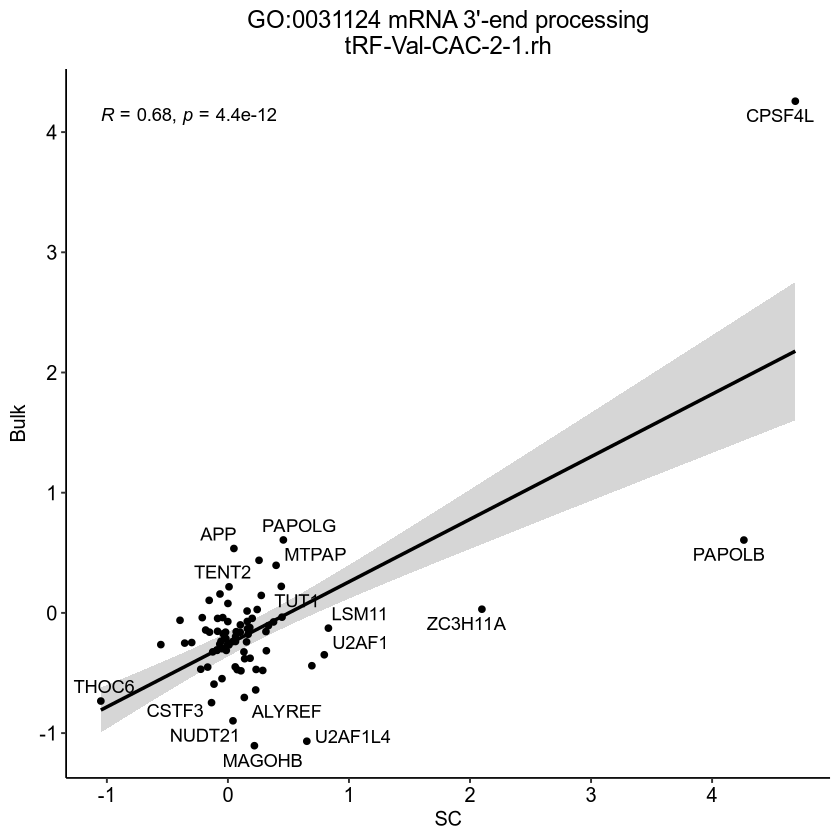

In [37]:
ggplot(data = tRF_fold_change_dfs[[4]], aes(x = sc_log2FC, y = bulk_log2FC)) +
    geom_smooth(method = "lm", formula = y ~ x, se = T, color = 'black') + geom_point() + xlab('SC') + ylab('Bulk') +
    stat_cor(aes(), method = "pearson") + theme_pubr() + geom_text_repel(aes(label = gene), segment.color = 'grey50') + 
    ggtitle('GO:0031124 mRNA 3\'-end processing\ntRF-Val-CAC-2-1.rh') + #ylim(-0.32, 0.32) + xlim(-0.32, 0.32) +
    theme(plot.title = element_text(hjust = 0.5))